In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
#check version
print('pandas : {pd.__version__}') 
print('numpy : {np.__version__}') 
print('seaborn : {sns.__version__}') 

pandas : {pd.__version__}
numpy : {np.__version__}
seaborn : {sns.__version__}


In [4]:
#import data
url = url='https://github.com/TheEconomist/big-mac-data/raw/master/output-data/big-mac-adjusted-index.csv'
df = pd.read_csv(url,parse_dates=['date']) #แปลงคอลัมน์วันที่เป็น datetime

In [5]:
df.tail()

,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,GDP_bigmac,adj_price,USD,EUR,GBP,JPY,CNY
1381,2022-07-01,TUR,TRY,Turkey,47.00,17.56500,2.675776,9256.997784,3.504791,-0.32602,-0.35300,-0.28199,0.16974,-0.21849
1382,2022-07-01,ARE,AED,United Arab Emirates,18.00,3.67305,4.900559,45059.735594,4.126598,0.04837,0.00640,0.11686,0.81952,0.21563
1383,2022-07-01,USA,USD,United States,5.15,1.00000,5.150000,69231.400000,4.546401,0.00000,-0.04003,0.06533,0.73557,0.15955
1384,2022-07-01,URY,UYU,Uruguay,255.00,41.91000,6.084467,14726.863618,3.599789,0.49213,0.43239,0.58961,1.58970,0.73019
1385,2022-07-01,VNM,VND,Vietnam,69000.00,23417.00000,2.946577,6375.564885,3.454747,-0.24706,-0.27720,-0.19787,0.30679,-0.12693


In [6]:
df.shape

(1386, 14)

In [7]:
#ดูโครงสร้างข้อมูล
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1386 entries, 0 to 1385
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1386 non-null   datetime64[ns]
 1   iso_a3         1386 non-null   object        
 2   currency_code  1386 non-null   object        
 3   name           1386 non-null   object        
 4   local_price    1386 non-null   float64       
 5   dollar_ex      1386 non-null   float64       
 6   dollar_price   1386 non-null   float64       
 7   GDP_bigmac     1386 non-null   float64       
 8   adj_price      1386 non-null   float64       
 9   USD            1386 non-null   float64       
 10  EUR            1359 non-null   float64       
 11  GBP            1386 non-null   float64       
 12  JPY            1386 non-null   float64       
 13  CNY            1386 non-null   float64       
dtypes: datetime64[ns](1), float64(10), object(3)
memory usage: 151.7+ KB


In [8]:
df_ft = df[(df['date'].dt.year == 2019)]
df_ft.head()

,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,GDP_bigmac,adj_price,USD,EUR,GBP,JPY,CNY
1021,2019-01-01,ARG,ARS,Argentina,75.00,37.455000,2.002403,20810.978188,3.399753,-0.43098,-0.50205,-0.39927,-0.29817,-0.37617
1022,2019-01-01,AUS,AUD,Australia,6.10,1.401640,4.352045,58098.493185,4.422256,-0.04923,-0.16798,0.00375,0.17267,0.04235
1023,2019-01-01,BRA,BRL,Brazil,16.90,3.717950,4.545516,9362.536049,3.085813,0.42311,0.24536,0.50241,0.75525,0.56019
1024,2019-01-01,GBR,GBP,Britain,3.19,0.783208,4.072992,48323.923768,4.154216,-0.05279,-0.17109,0.00000,0.16829,0.03846
1025,2019-01-01,CAN,CAD,Canada,6.77,1.331400,5.084873,42034.227332,3.981740,0.23376,0.07967,0.30252,0.52171,0.35260


In [9]:
#ฟิตเตอร์เอาฉะเพราะ 2019
#df = df[(df['date'].dt.year==2019) & (df['date'].dt.month==1)]
df = df[(df.date.dt.year == 2019) | (df.date.dt.month == 1)]
df.head(10)

,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,GDP_bigmac,adj_price,USD,EUR,GBP,JPY,CNY
188,2006-01-01,ARG,ARS,Argentina,4.75,3.063800,1.550362,8484.828303,2.317204,-0.21991,-0.49021,-0.42218,-0.04438,0.13507
189,2006-01-01,AUS,AUD,Australia,3.25,1.330800,2.442140,38950.746212,2.999237,-0.05063,-0.37958,-0.29680,0.16300,0.38138
190,2006-01-01,BRA,BRL,Brazil,6.20,2.261500,2.741543,5052.956482,2.240376,0.42675,-0.06761,0.05680,0.74780,1.07600
191,2006-01-01,GBR,GBP,Britain,1.88,0.566926,3.316132,32903.668309,2.863863,0.35006,-0.11772,0.00000,0.65386,0.96441
192,2006-01-01,CAN,CAD,Canada,3.52,1.170400,3.007519,33483.577219,2.876845,0.21889,-0.20344,-0.09716,0.49317,0.77356
193,2006-01-01,CHL,CLP,Chile,1560.00,522.750000,2.984218,7425.998296,2.293501,0.51707,-0.00858,0.12370,0.85845,1.20742
194,2006-01-01,CHN,CNY,China,10.50,8.064100,1.302067,3649.441186,2.208956,-0.31274,-0.55087,-0.49094,-0.15809,0.00000
195,2006-01-01,CZE,CZK,Czech Republic,62.00,23.837500,2.600944,13873.402167,2.437837,0.24394,-0.18707,-0.07860,0.52386,0.81001
196,2006-01-01,DNK,DKK,Denmark,27.75,6.176900,4.492545,28199.198361,2.758545,0.89883,0.24090,0.40648,1.32611,1.76291
197,2006-01-01,EGY,EGP,Egypt,9.25,5.740000,1.611498,2311.719195,2.179008,-0.13773,-0.43650,-0.36131,0.05630,0.25466


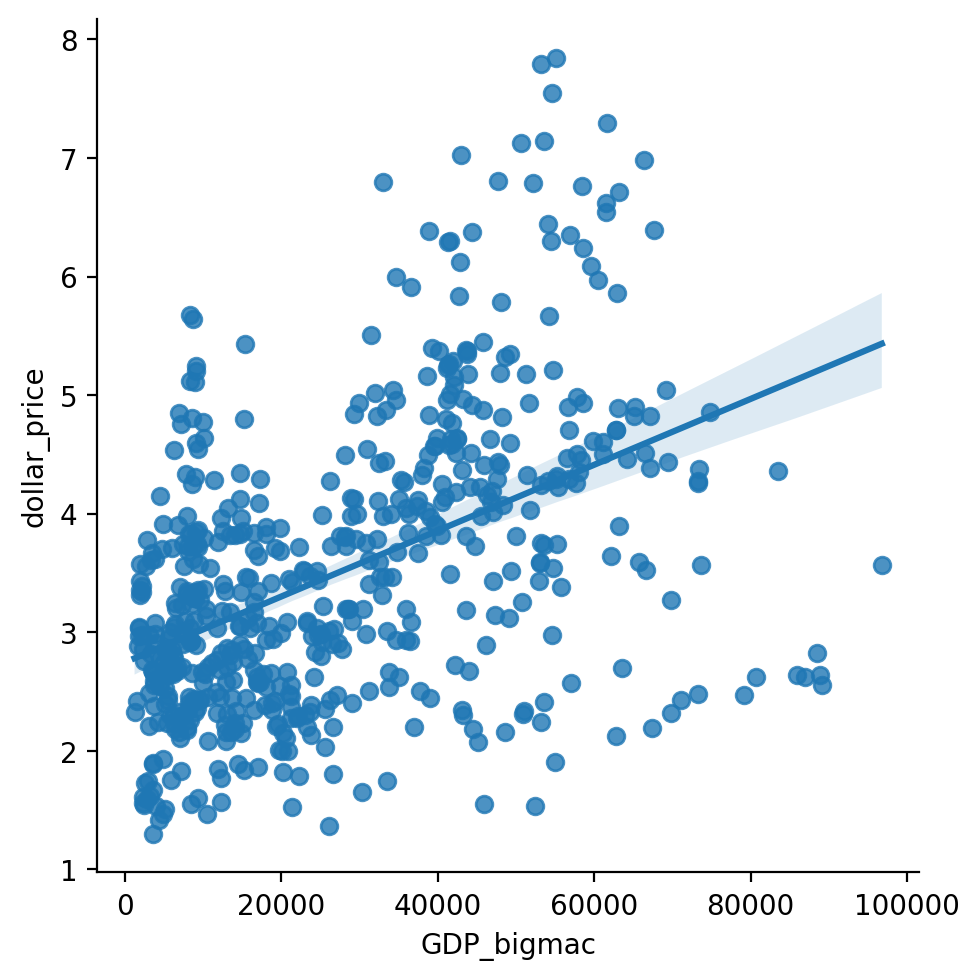

In [11]:
sns.lmplot(data=df, x='GDP_bigmac', y='dollar_price')

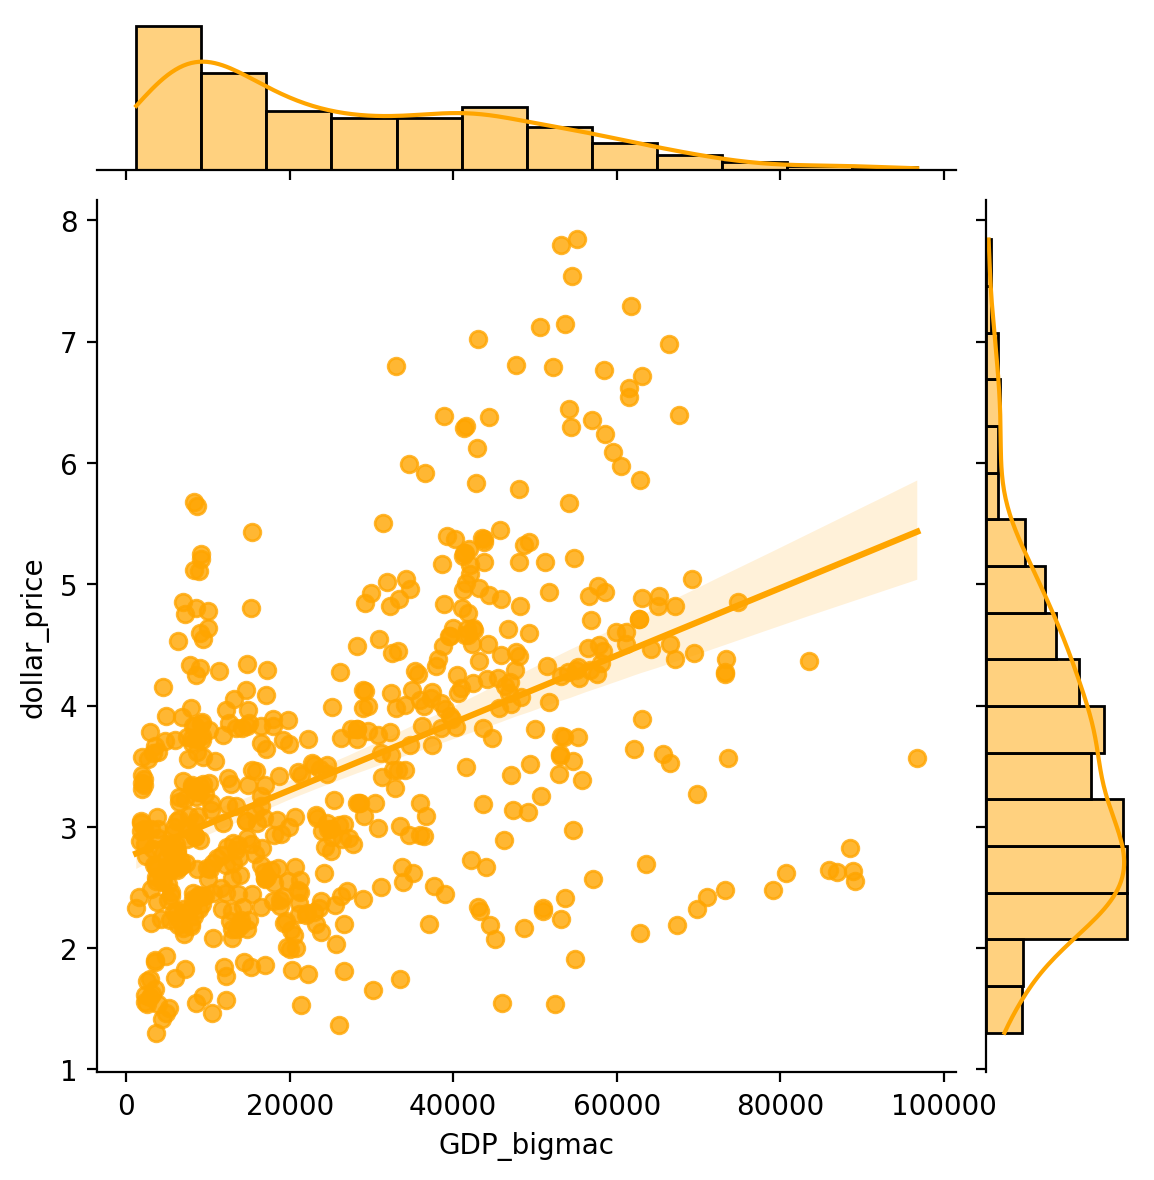

In [12]:
sns.jointplot(x='GDP_bigmac', y='dollar_price', data=df, kind='reg',color='orange');

In [13]:
#sklearn : LinearRegression
from sklearn.linear_model import LinearRegression

In [14]:
model = LinearRegression()
model

LinearRegression()

In [15]:
df[['GDP_bigmac']].head(10) #check data series

,GDP_bigmac
188,8484.828303
189,38950.746212
190,5052.956482
191,32903.668309
192,33483.577219
193,7425.998296
194,3649.441186
195,13873.402167
196,28199.198361
197,2311.719195


In [16]:
#วิธีที่ 1
#model.fit(df[['GDP_bigmac']],df['dollar_price']) 

In [17]:
#วิธีที่ 2
X=df[['GDP_bigmac']] #expect 2d array not series 1d
y=df.dollar_price

In [18]:
model.fit(X,y) #Create model

LinearRegression()

In [19]:
model.score(X,y) # R-Squared

0.2198360563875391

In [20]:
model.intercept_

2.7467687293129432

In [21]:
model.coef_

array([2.77615046e-05])

$y=\alpha+\beta x$

In [23]:
model.intercept_ + model.coef_ * 9000 #รูปแบบไม่ถูกต้อง

array([2.99662227])

In [24]:
model.predict([[9000]]) #รูปแบบที่ถูกต้อง และต้องเป็นอาร์เรย 2 มิติ

C:\Users\pranchai\Miniconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.99662227])

In [25]:
model.predict([[9000],[40000]]) #คาดการณ์ราคาสินค้า

C:\Users\pranchai\Miniconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.99662227, 3.85722891])

In [26]:
df_np = np.arange(5000,50001,2500).reshape(-1,1) #convet to arra 2 d

In [27]:
df_np

array([[ 5000],
       [ 7500],
       [10000],
       [12500],
       [15000],
       [17500],
       [20000],
       [22500],
       [25000],
       [27500],
       [30000],
       [32500],
       [35000],
       [37500],
       [40000],
       [42500],
       [45000],
       [47500],
       [50000]])

In [28]:
model.predict(df_np) #predict by df_np model

C:\Users\pranchai\Miniconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.88557625, 2.95498001, 3.02438378, 3.09378754, 3.1631913 ,
       3.23259506, 3.30199882, 3.37140258, 3.44080634, 3.51021011,
       3.57961387, 3.64901763, 3.71842139, 3.78782515, 3.85722891,
       3.92663268, 3.99603644, 4.0654402 , 4.13484396])

In [29]:
model.predict([[5000]]) # check answer

C:\Users\pranchai\Miniconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.88557625])